# 7. Analyzing Time Series Data

### 0. List of Contents
#### 1. Importing Libraries and Dataframes
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Data

### 1. Importing Libraries and Dataframes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Creating path
path=r'/Users/fru.s/Documents/CF - Data Analytics/2.6. Sourcing Open Data/Open Source Data Analysis/02 Data/Prepared Data/'

#### as I am a woman based in Europe I decided to you to analyze the SMAM for women in Europe from my orginal dataset
#### "The singulate mean age at marriage (SMAM) is the mean age at first marriage among persons who ever marry by a certain age limit, usually before the age of 50 years. It measures the average number of years lived as single or “never married” "

In [5]:
#importing dataframe
smam_eu_w=pd.read_excel(os.path.join(path,'SMAM_TS.xlsx'),sheet_name='EUROPE WOMEN')
smam_eu_w.head()

,YEAR,SMAM AVG
0,1970,22.038235
1,1971,22.170000
2,1972,22.241667
3,1973,22.390909
4,1974,22.409091


### 2. Subsetting, wrangling, and cleaning time-series data

In [9]:
smam_eu_w.dtypes

YEAR          int64
SMAM AVG    float64
dtype: object

In [10]:
# Set the "Date" column as the index

from datetime import datetime

smam_eu_w['datetime'] = pd.to_datetime(smam_eu_w['YEAR'],format='%Y') 
smam_eu_w = smam_eu_w.set_index('datetime')
smam_eu_w.drop(['YEAR'], axis=1, inplace=True) 
smam_eu_w.head()

,SMAM AVG
datetime,
1970-01-01,22.038235
1971-01-01,22.170000
1972-01-01,22.241667
1973-01-01,22.390909
1974-01-01,22.409091


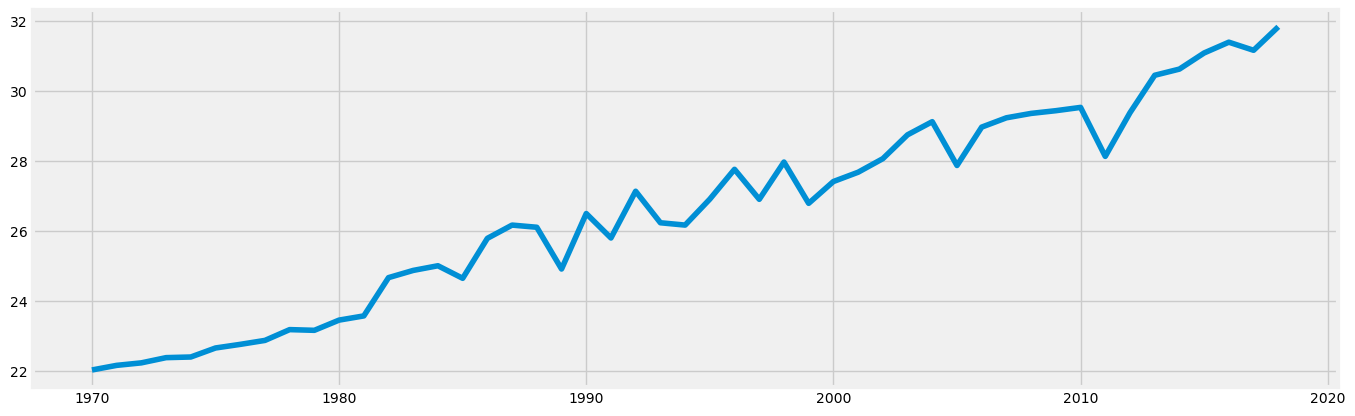

In [11]:
# Plot the n data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(smam_eu_w)

### 3. Time-series analysis: decomposition

In [12]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(smam_eu_w, model='additive')

In [13]:
# This will define a fixed size for all special charts.
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

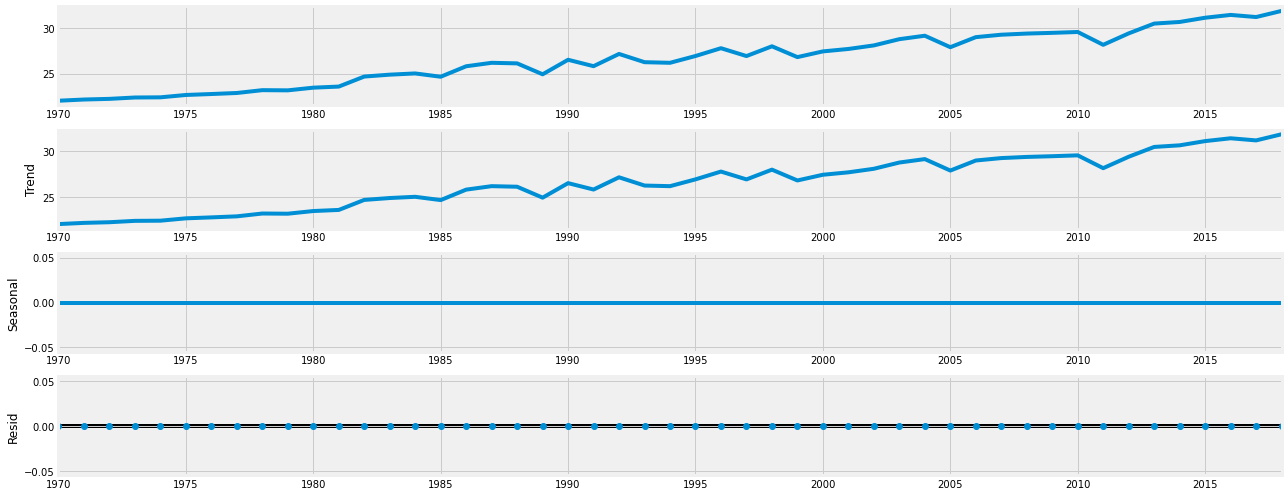

In [14]:
# Plot the separate components
decomposition.plot()
plt.show()

#### There isn't any seasonality or noise in the data, but that makes sense due to the the values being the average age at first marriage, which isn't influenced that much by seasonal changes or other short term external factors 

### 4. Testing for stationarity

#### Disprove the null hypothesis = no unit root = stationary data = can proceed with forecast

In [16]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(smam_eu_w['SMAM AVG'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.293383
p-value                         0.926436
Number of Lags Used             7.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


#### Test statistic larger than critical value = can’t reject null hypothesis
#### Test statistic smaller than critical value = can reject null hypothesis
#### Test Statistic = -0.293383 while Critical Value (5%) -2.935135
#### Which means test statistic smaller than critical value. However the p value is much higher than 0.05, which means p-values "is not statistically significant and indicates strong evidence for the null hypothesis." so I continue by plotting for autocorrelations and stationarizing the data

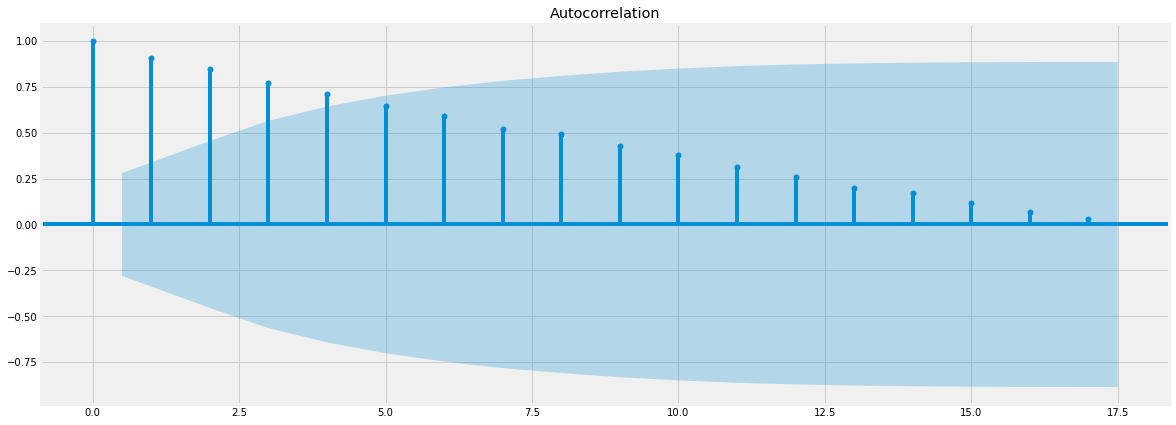

In [17]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(smam_eu_w)
plt.show()

### 5. Stationarizing the  Data

In [18]:
smam_eu_w_diff = smam_eu_w - smam_eu_w.shift(1) 

In [19]:
smam_eu_w_diff.dropna(inplace = True)

In [20]:
smam_eu_w_diff.head(10)

,SMAM AVG
datetime,
1971-01-01,0.131765
1972-01-01,0.071667
1973-01-01,0.149242
1974-01-01,0.018182
1975-01-01,0.257576
1976-01-01,0.103333
1977-01-01,0.113333
1978-01-01,0.308333
1979-01-01,-0.020238


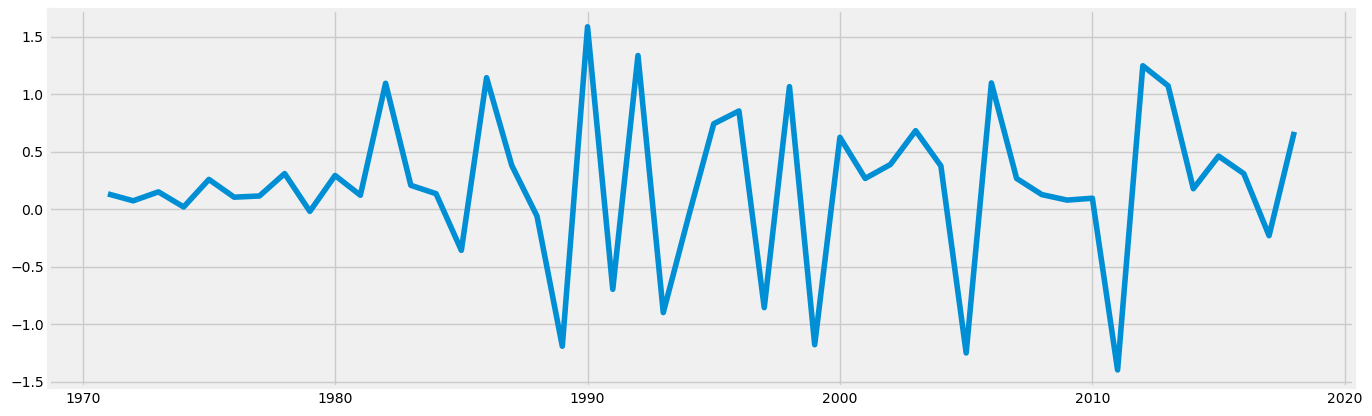

In [21]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(smam_eu_w_diff)

In [22]:
dickey_fuller(smam_eu_w_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.147209
p-value                         0.023251
Number of Lags Used             6.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


#### p value is lower than 0.05 and test statistic is smaller than Critical Value (5%)

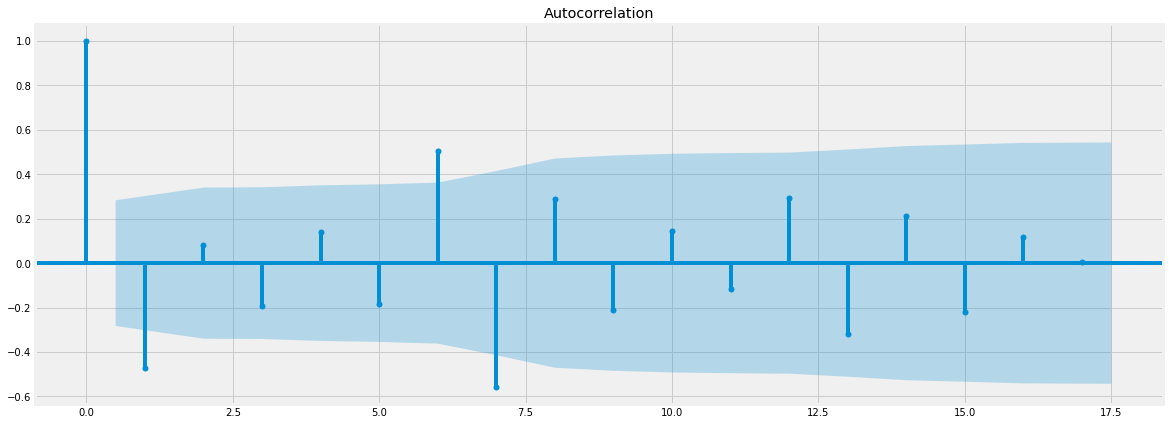

In [23]:
plot_acf(smam_eu_w_diff)
plt.show()